In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


DATA_PATH = "./archive/brisc2025/classification_task/train"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    width_shift_range=0.18,
    height_shift_range=0.18,
    zoom_range=0.30,
    brightness_range=[0.65, 1.45],
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.20
)

train_gen = train_datagen.flow_from_directory(
    DATA_PATH,
    target_size=(256,256),
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    subset="training"
)

val_gen = train_datagen.flow_from_directory(
    DATA_PATH,
    target_size=(256,256),
    batch_size=32,
    class_mode="categorical",
    shuffle=False,
    subset="validation"
)


model = models.Sequential([
    layers.Input((256,256,3)),

    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Conv2D(128,3,padding='same',activation='relu'),
    layers.Conv2D(128,3,padding='same',activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Conv2D(256,3,padding='same',activation='relu'),
    layers.Conv2D(256,3,padding='same',activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.45),

    layers.Conv2D(512,3,padding="same",activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.50),

    layers.Flatten(),
    layers.Dense(512,activation='relu'),
    layers.Dropout(0.55),
    layers.Dense(4,activation='softmax')
])

optimizer = Adam(learning_rate=1e-4)

model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

print(model.summary())

# ======================= Training =======================

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=40,
    callbacks=[
        EarlyStopping(monitor="val_accuracy", patience=7, restore_best_weights=True),
        ReduceLROnPlateau(monitor="val_loss", factor=0.35, patience=3, min_lr=1e-6)
    ]
)

model.save("BEST_CNN_BRISC256.h5")
print("\n CNN Model Trained & Saved Successfully!")


2025-12-01 07:24:12.880170: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-01 07:24:13.094083: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-01 07:24:14.011304: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


Found 3402 images belonging to 4 classes.
Found 849 images belonging to 4 classes.


I0000 00:00:1764554055.623493   19848 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4032 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 256, 256, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32, 32, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 16, 16, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 19,136,164 (73.00 MB)

 Trainable params: 19,134,180 (72.99 MB)

 Non-trainable params: 1,984 (7.75 KB)

None
Epoch 1/40


2025-12-01 07:24:18.794211: I external/local_xla/xla/service/service.cc:163] XLA service 0x7f60fc00d110 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-12-01 07:24:18.794232: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 4050 Laptop GPU, Compute Capability 8.9
2025-12-01 07:24:18.887190: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-12-01 07:24:19.346978: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91600
2025-12-01 07:24:20.014972: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2579', 60 bytes spill stores, 60 bytes spill loads

I0000 00:00:1764554082.138635   19991 device_compiler.h:196] Compiled cluster using XLA!  This line 

 48/107 ━━━━━━━━━━━━━━━━━━━━ 13s 223ms/step - accuracy: 0.2766 - loss: 4.1192

2025-12-01 07:24:55.104391: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:310] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.35GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2025-12-01 07:24:55.474986: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:310] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.21GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2025-12-01 07:24:55.771543: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:310] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.16GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step - accuracy: 0.3048 - loss: 3.3399

2025-12-01 07:25:20.638517: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:310] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.04GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2025-12-01 07:25:21.577306: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:310] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.55GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2025-12-01 07:25:22.263049: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:310] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.34GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2025-12-01 07:25:29.896094: I external/local_xla/xla/st

107/107 ━━━━━━━━━━━━━━━━━━━━ 77s 483ms/step - accuracy: 0.3419 - loss: 2.3113 - val_accuracy: 0.2297 - val_loss: 4.8900 - learning_rate: 1.0000e-04
Epoch 2/40
107/107 ━━━━━━━━━━━━━━━━━━━━ 35s 329ms/step - accuracy: 0.4127 - loss: 1.2929 - val_accuracy: 0.2297 - val_loss: 4.8840 - learning_rate: 1.0000e-04
Epoch 3/40
107/107 ━━━━━━━━━━━━━━━━━━━━ 32s 299ms/step - accuracy: 0.4544 - loss: 1.2341 - val_accuracy: 0.3628 - val_loss: 5.5506 - learning_rate: 1.0000e-04
Epoch 4/40
107/107 ━━━━━━━━━━━━━━━━━━━━ 35s 329ms/step - accuracy: 0.5162 - loss: 1.0975 - val_accuracy: 0.3157 - val_loss: 5.7035 - learning_rate: 1.0000e-04
Epoch 5/40
107/107 ━━━━━━━━━━━━━━━━━━━━ 35s 321ms/step - accuracy: 0.5694 - loss: 0.9910 - val_accuracy: 0.3428 - val_loss: 4.7458 - learning_rate: 1.0000e-04
Epoch 6/40
107/107 ━━━━━━━━━━━━━━━━━━━━ 37s 341ms/step - accuracy: 0.6026 - loss: 0.9297 - val_accuracy: 0.3757 - val_loss: 2.4707 - learning_rate: 1.0000e-04
Epoch 7/40
107/107 ━━━━━━━━━━━━━━━━━━━━ 35s 328ms/step - 


 CNN Model Trained & Saved Successfully!


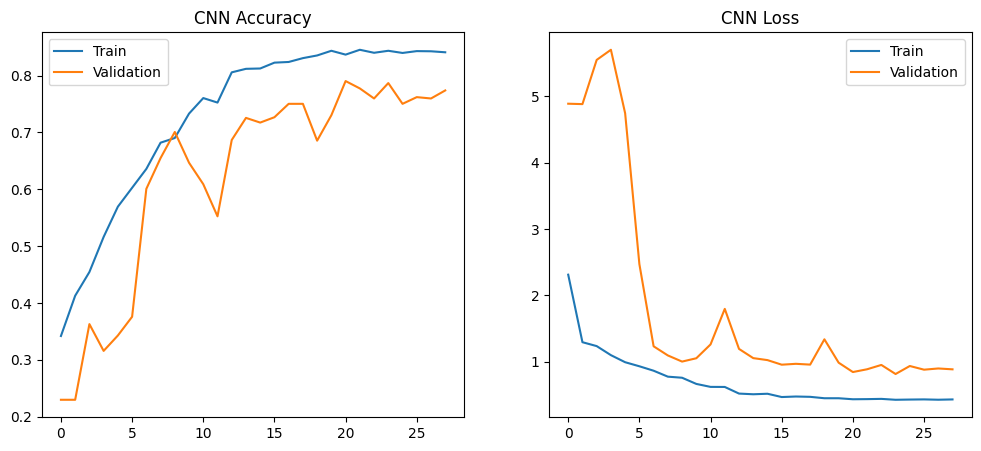

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label="Train")
plt.plot(history.history['val_accuracy'],label="Validation")
plt.title("CNN Accuracy"); plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'],label="Train")
plt.plot(history.history['val_loss'],label="Validation")
plt.title("CNN Loss"); plt.legend()

plt.show()

27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 213ms/step

VALIDATION CLASSIFICATION REPORT:

              precision    recall  f1-score   support

      glioma       0.83      0.84      0.83       195
  meningioma       0.72      0.58      0.64       226
    no_tumor       0.78      0.90      0.84       181
   pituitary       0.81      0.86      0.83       247

    accuracy                           0.79       849
   macro avg       0.79      0.79      0.79       849
weighted avg       0.78      0.79      0.78       849



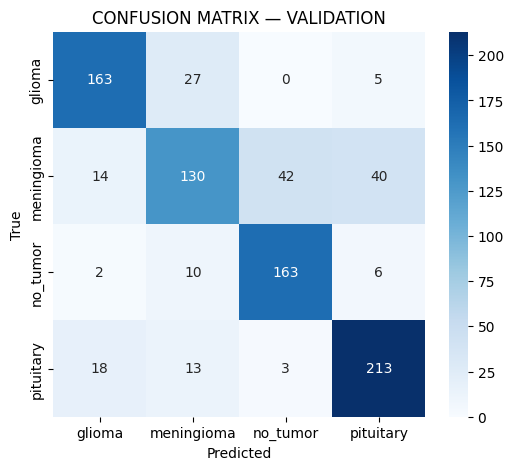

In [9]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ---- PREDICT ON VALIDATION SET ----
val_pred_prob = model.predict(val_gen)
val_pred = np.argmax(val_pred_prob, axis=1)
val_true = val_gen.classes   # <--- correct matching pair

print("\nVALIDATION CLASSIFICATION REPORT:\n")
print(classification_report(val_true, val_pred, target_names=list(val_gen.class_indices.keys())))

cm = confusion_matrix(val_true, val_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=val_gen.class_indices.keys(),
            yticklabels=val_gen.class_indices.keys())
plt.title("CONFUSION MATRIX — VALIDATION")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

NameError: name 'y_true' is not defined

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Test Accuracy: {accuracy*100:.2f}%')
print(f'Test Precision: {precision*100:.2f}%')
print(f'Test Recall: {recall*100:.2f}%')
print(f'Test F1 Score: {f1*100:.2f}%')

# Detailed per-class report
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=list(test_generator.class_indices.keys())))

NameError: name 'y_true' is not defined